In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set(rc={'figure.figsize': (12, 10)})

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss, roc_curve, auc
from math import sqrt

In [2]:
data = pd.read_csv('HR-Employee-Attrition.csv')
print(data.shape)
data.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
for column in data:
    unique_values = np.unique(data[column])
    nr_values = len(unique_values)
    if nr_values <= 10:
        print('The number of values for feature {} is: {} -- {}'.format(column, nr_values, unique_values))
    else:
        print('The number of values for feature {} is: {}'.format(column, nr_values))

The number of values for feature Age is: 43
The number of values for feature Attrition is: 2 -- ['No' 'Yes']
The number of values for feature BusinessTravel is: 3 -- ['Non-Travel' 'Travel_Frequently' 'Travel_Rarely']
The number of values for feature DailyRate is: 886
The number of values for feature Department is: 3 -- ['Human Resources' 'Research & Development' 'Sales']
The number of values for feature DistanceFromHome is: 29
The number of values for feature Education is: 5 -- [1 2 3 4 5]
The number of values for feature EducationField is: 6 -- ['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
The number of values for feature EmployeeCount is: 1 -- [1]
The number of values for feature EmployeeNumber is: 1470
The number of values for feature EnvironmentSatisfaction is: 4 -- [1 2 3 4]
The number of values for feature Gender is: 2 -- ['Female' 'Male']
The number of values for feature HourlyRate is: 71
The number of values for feature JobInvolvement is:

In [6]:
to_drop = ['DailyRate', 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'StandardHours']
data.drop(to_drop, axis=1, inplace=True)
data.shape

(1470, 27)

Text(0, 0.5, 'count')

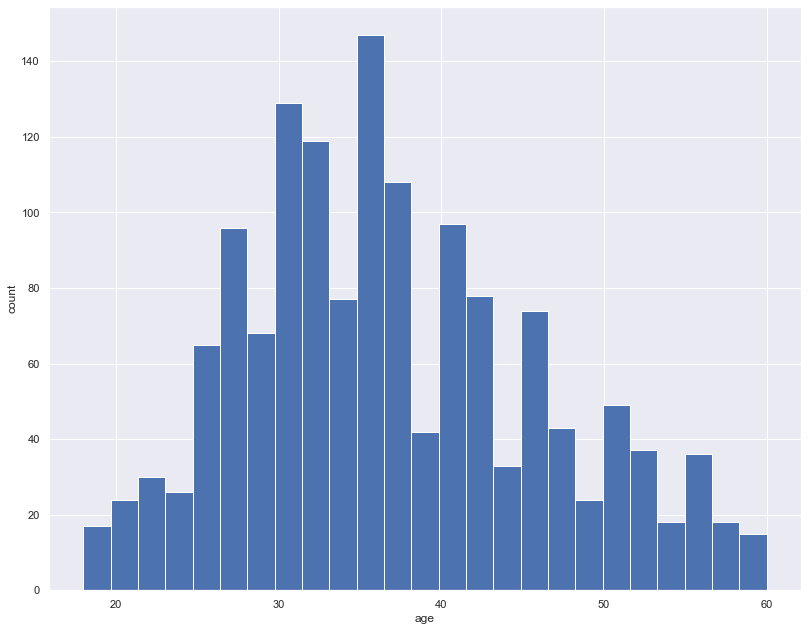

In [7]:
fig, ax = plt.subplots(1, 1)
ax.hist(data['Age'], 25)
plt.xlabel('age')
plt.ylabel('count')

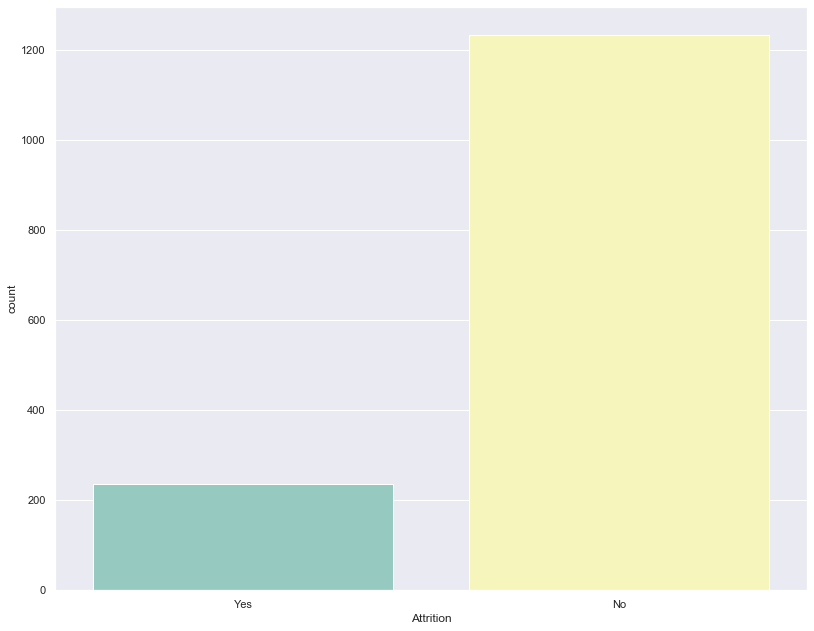

In [8]:
sns.countplot(x='Attrition', data=data, palette='Set3')

In [9]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

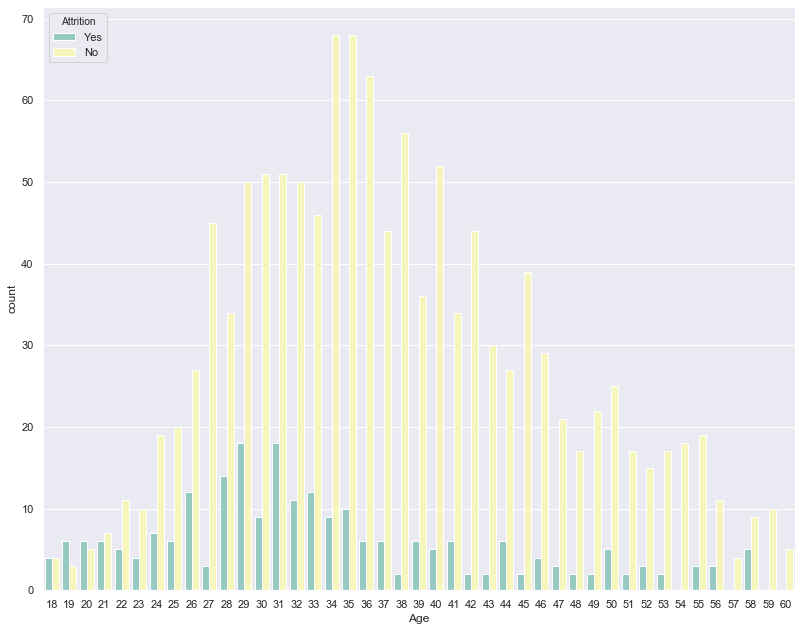

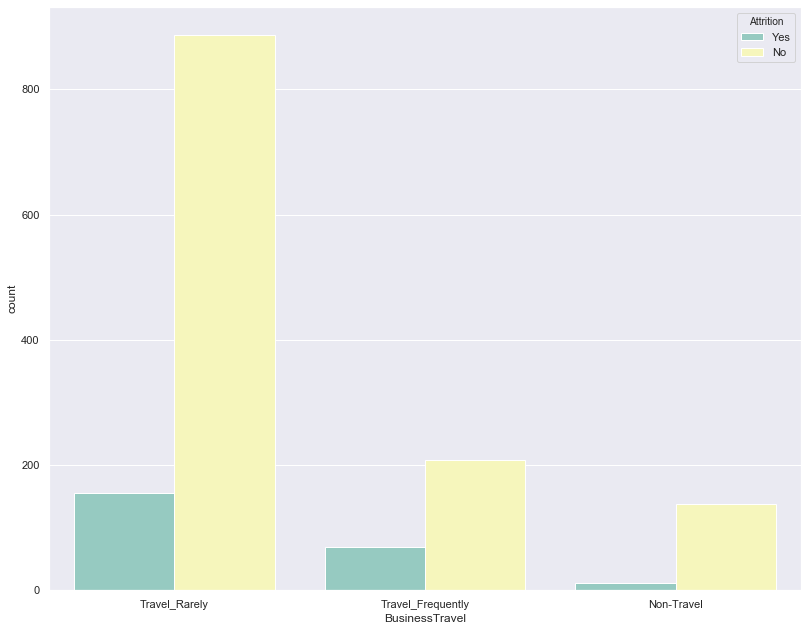

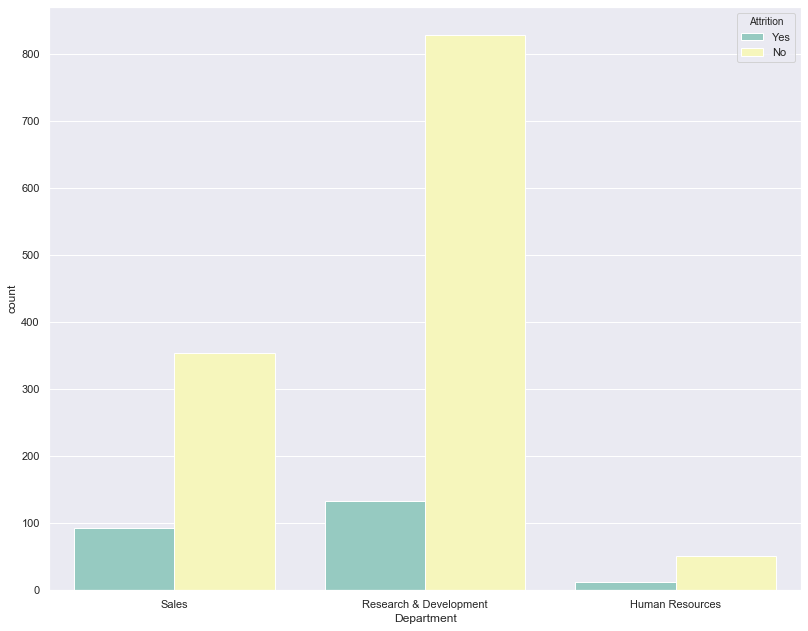

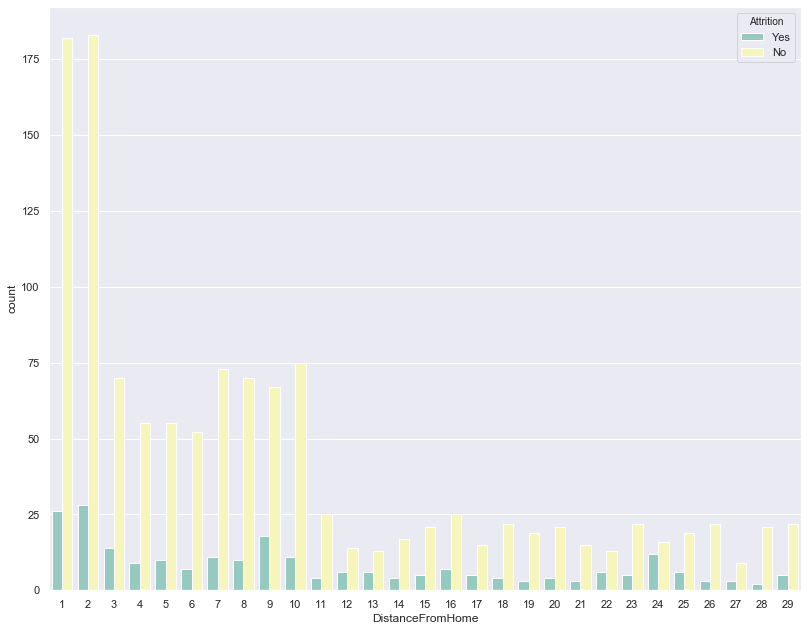

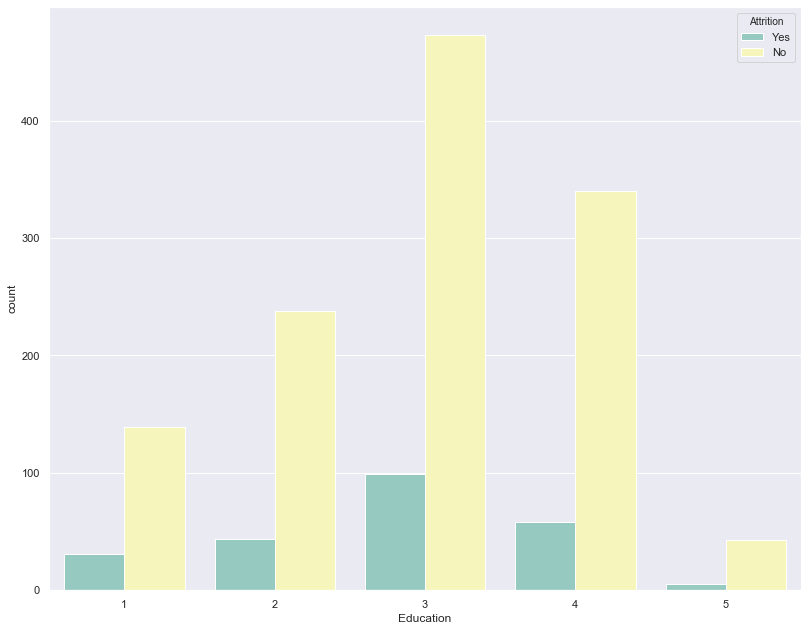

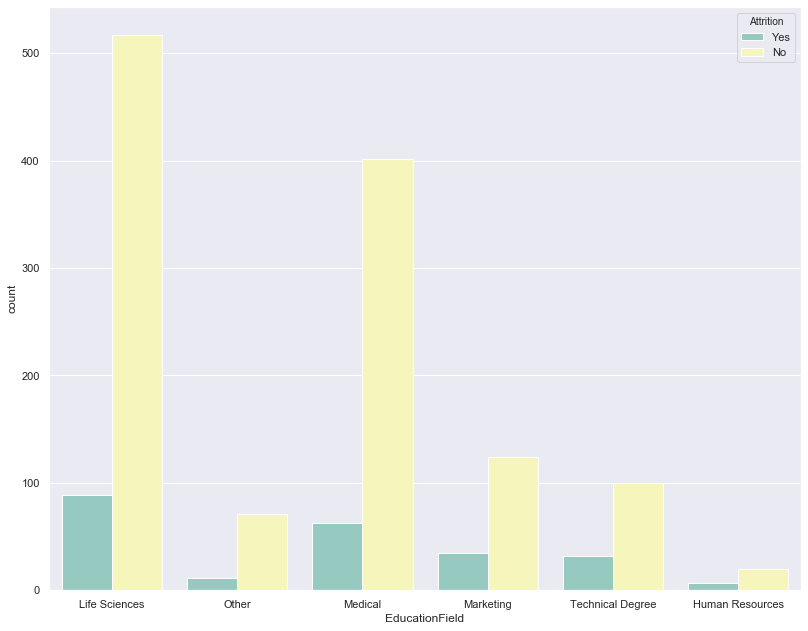

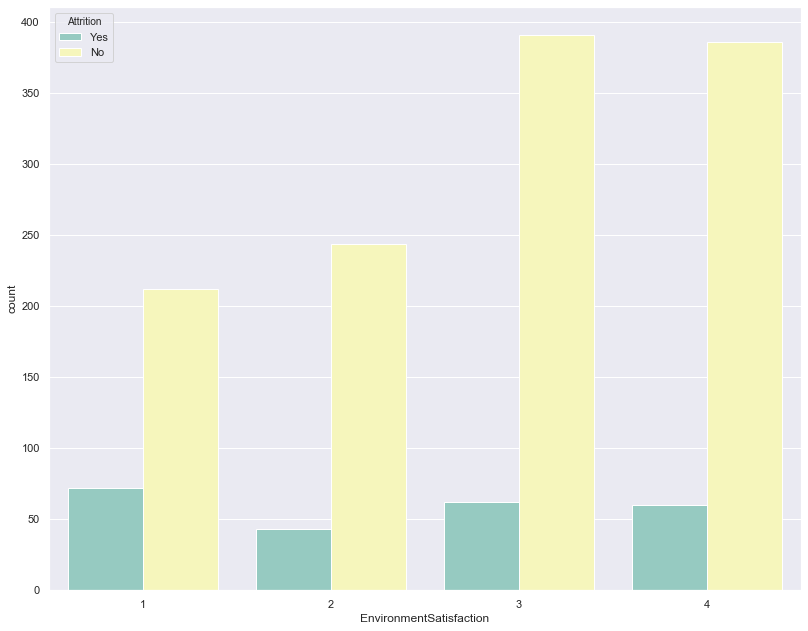

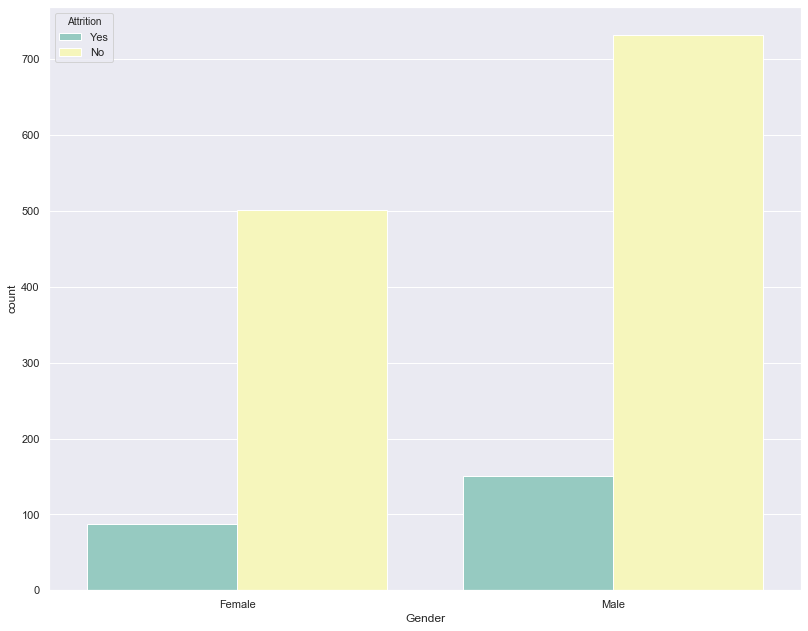

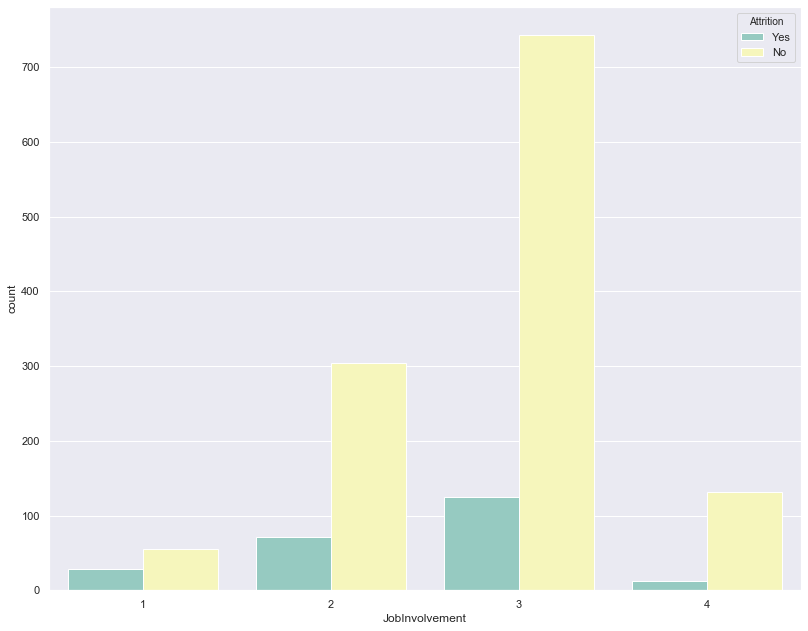

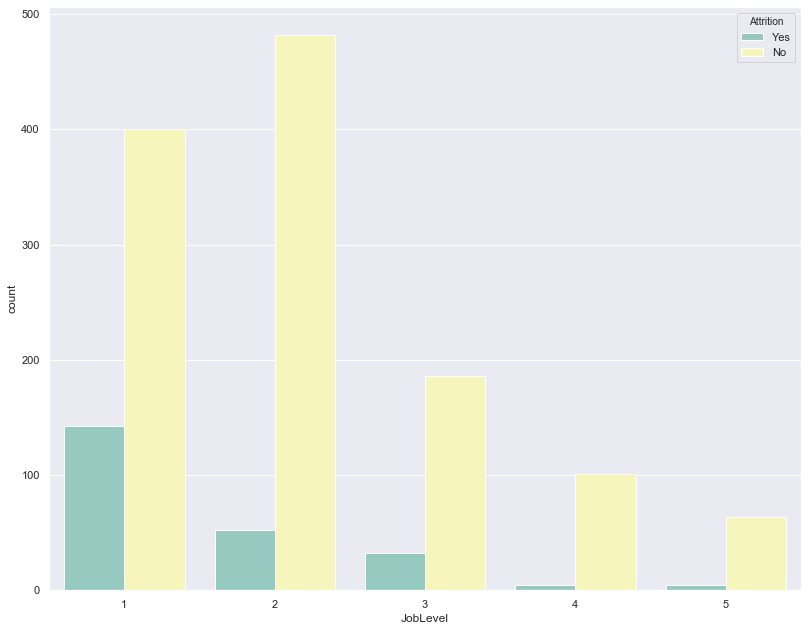

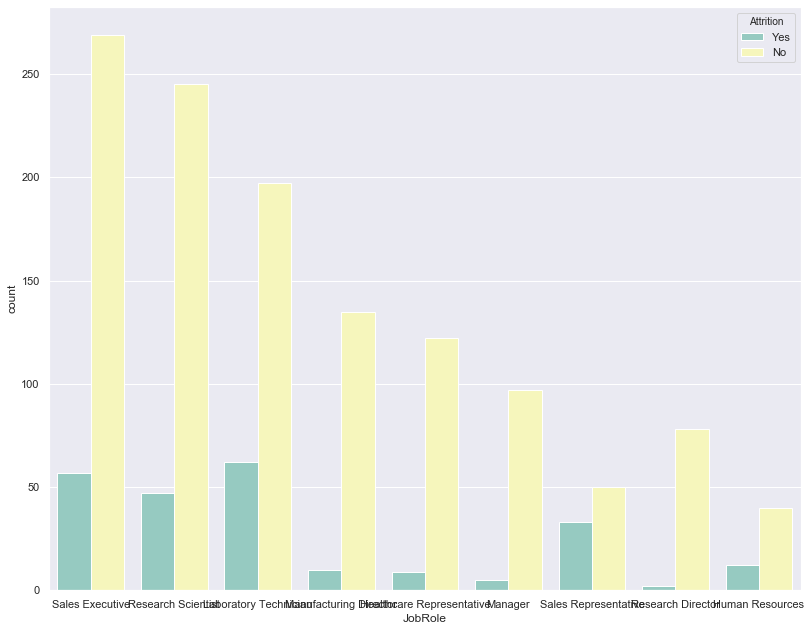

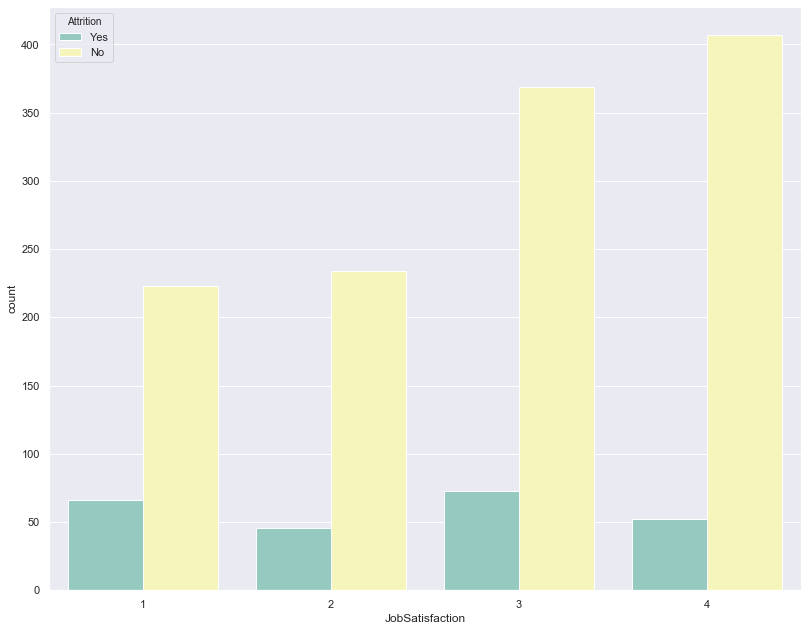

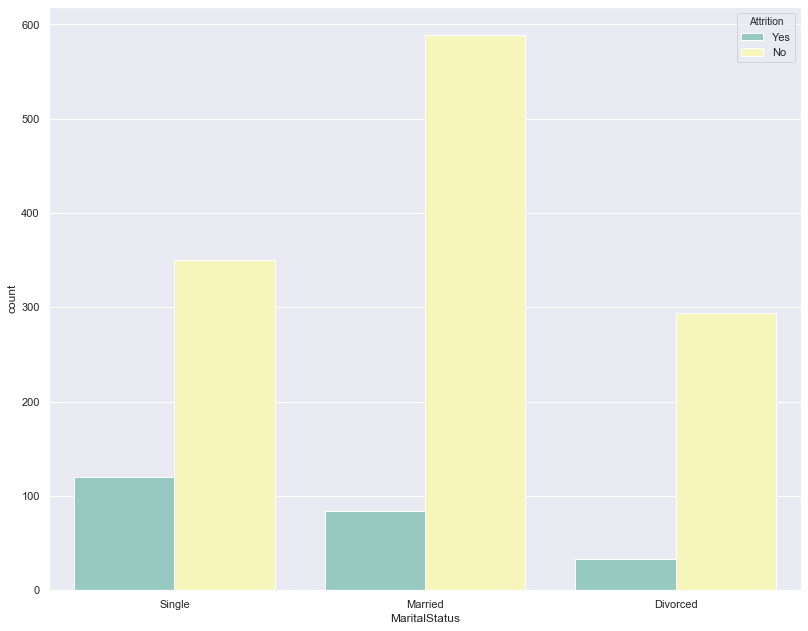

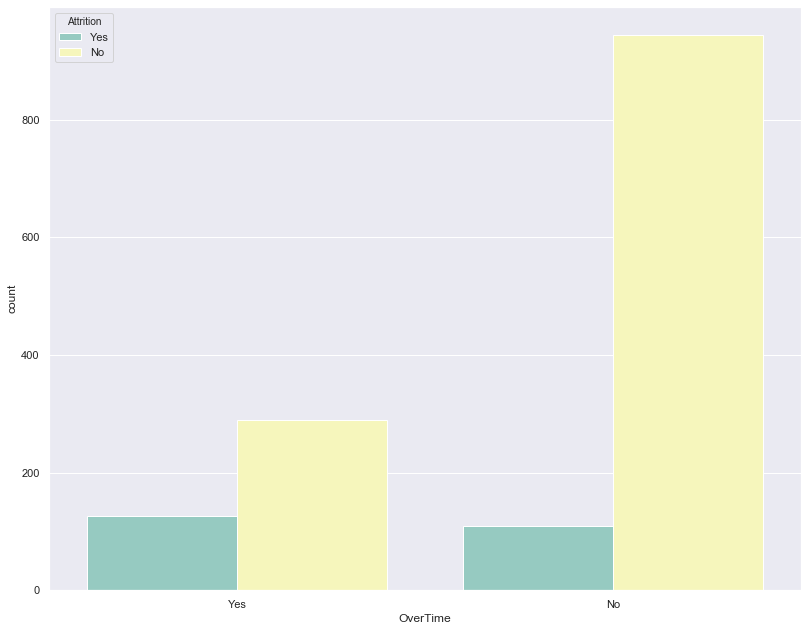

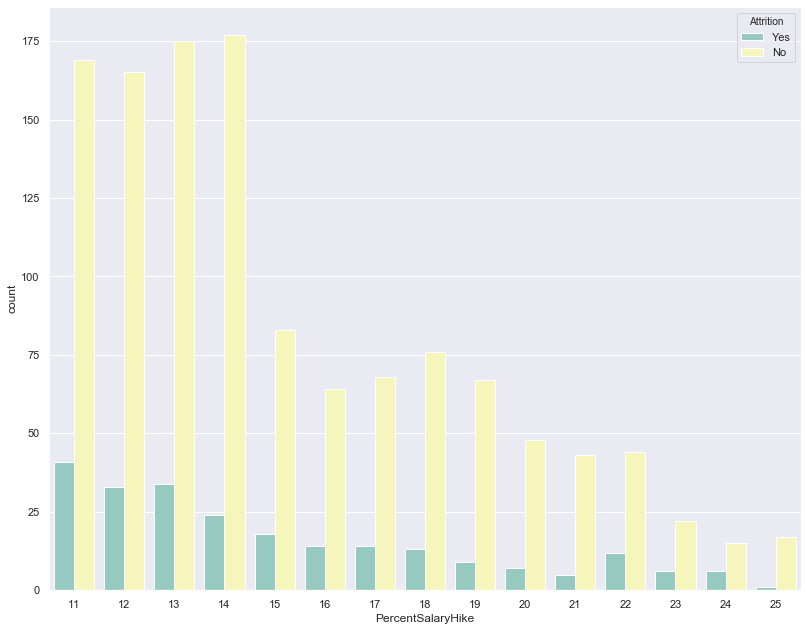

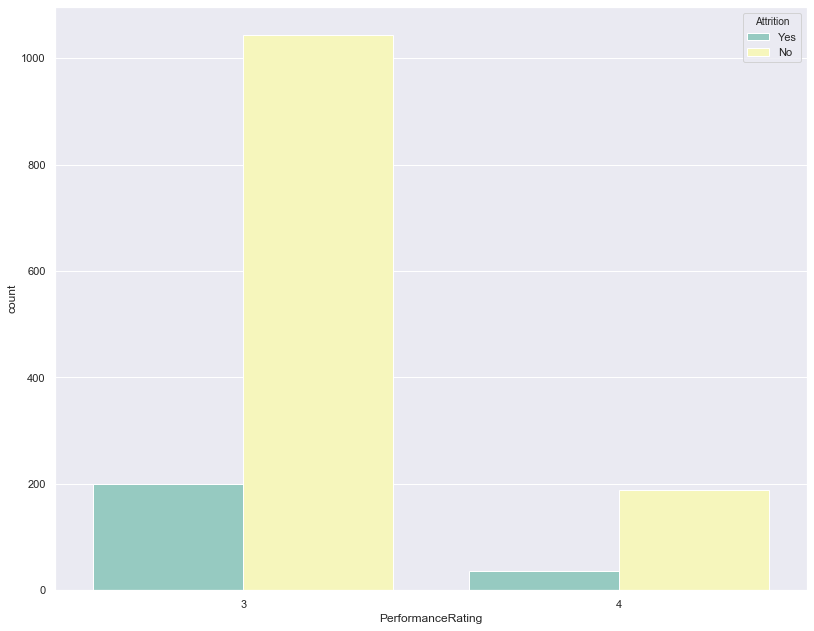

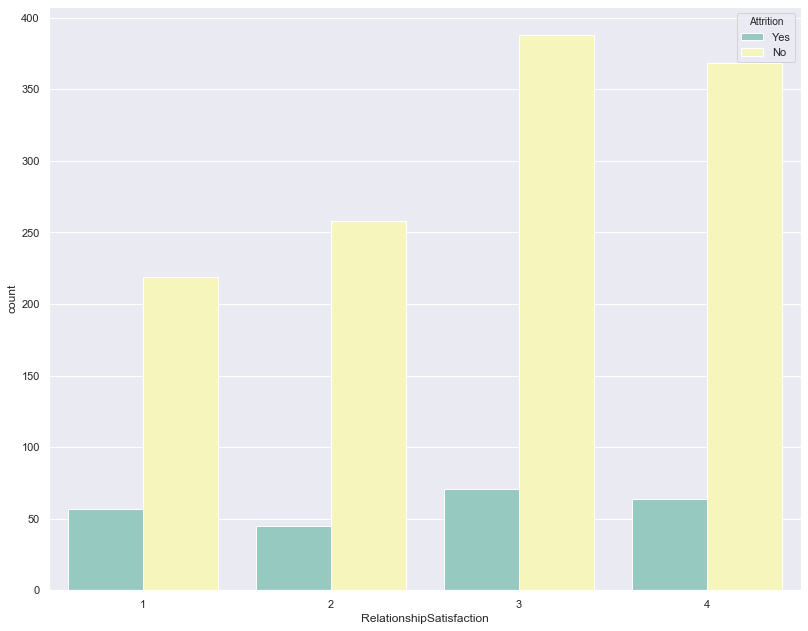

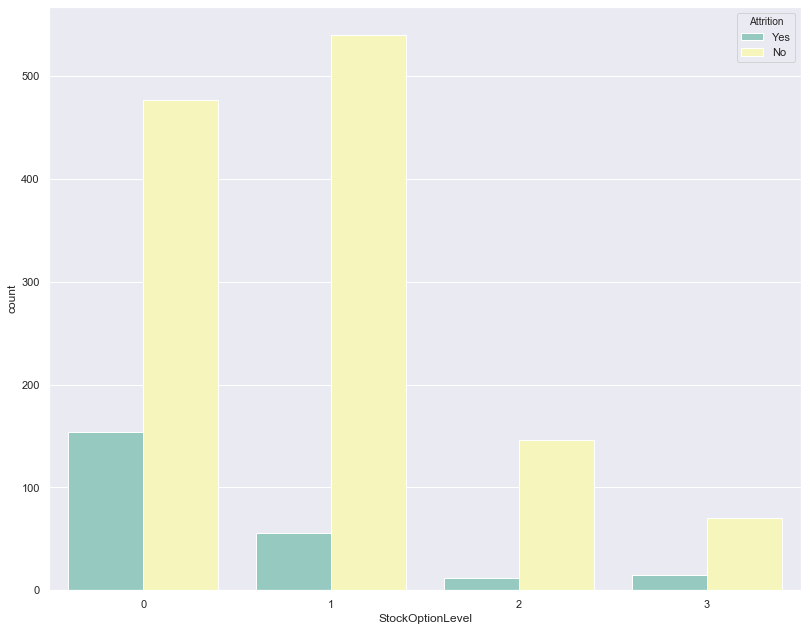

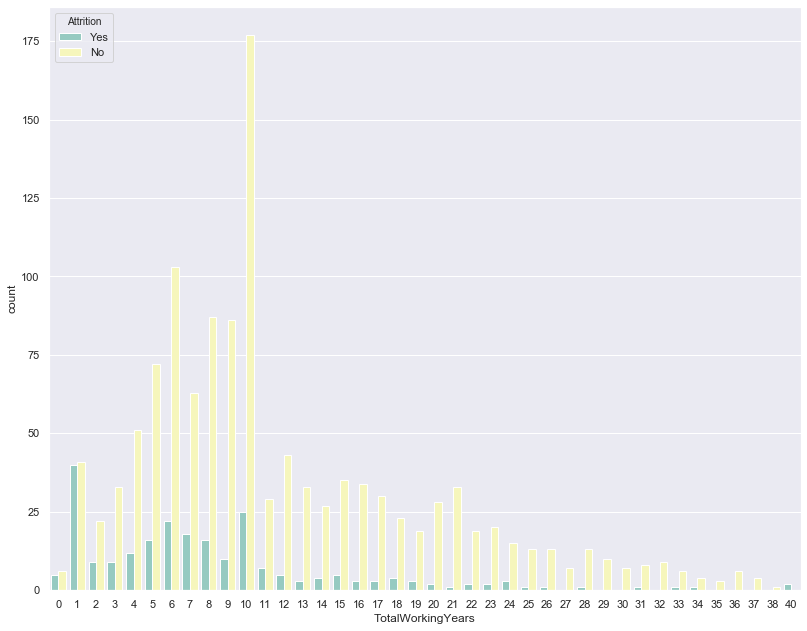

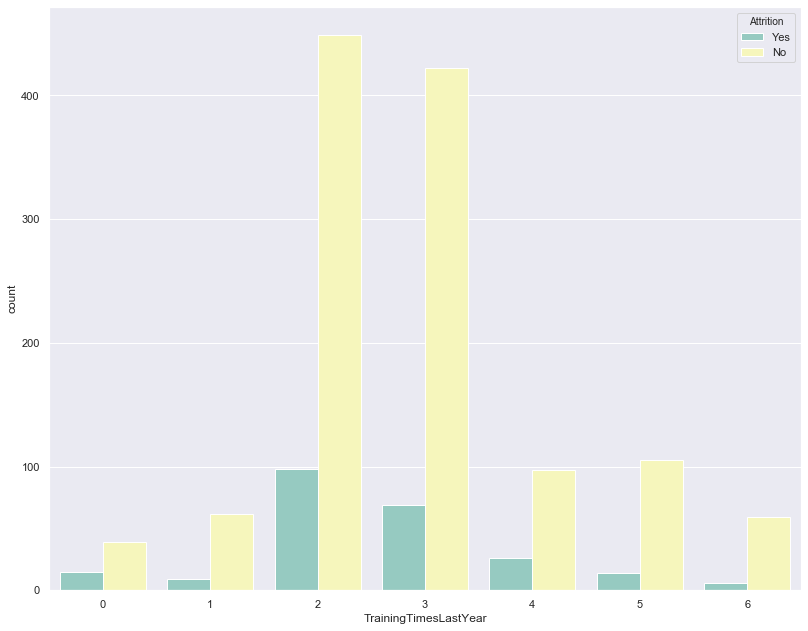

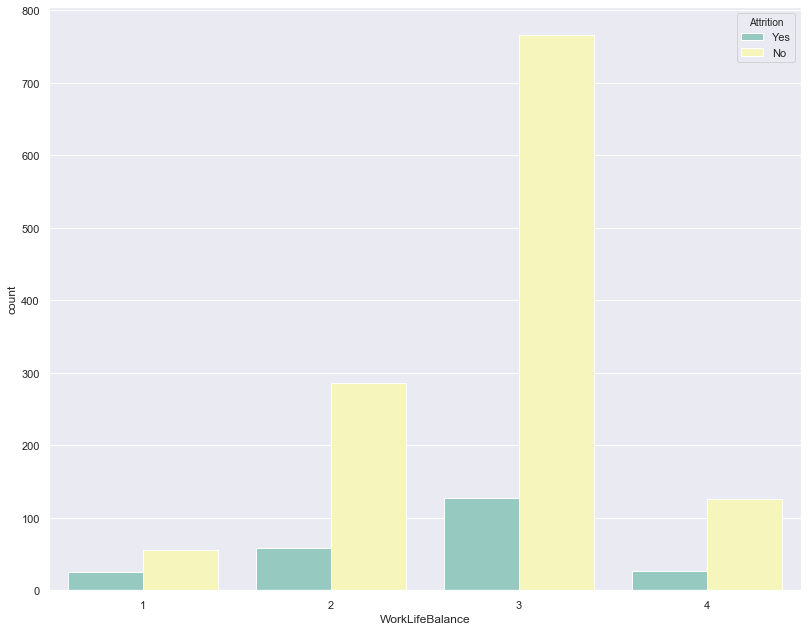

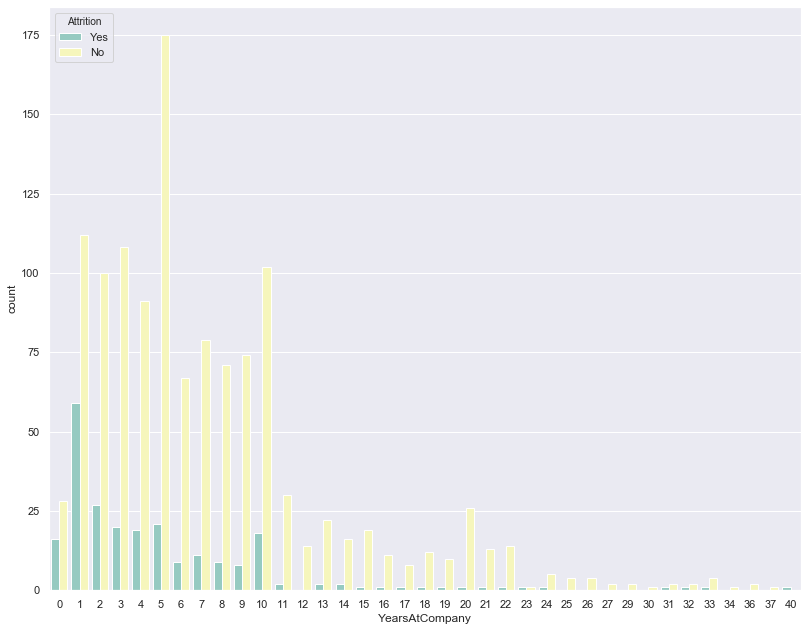

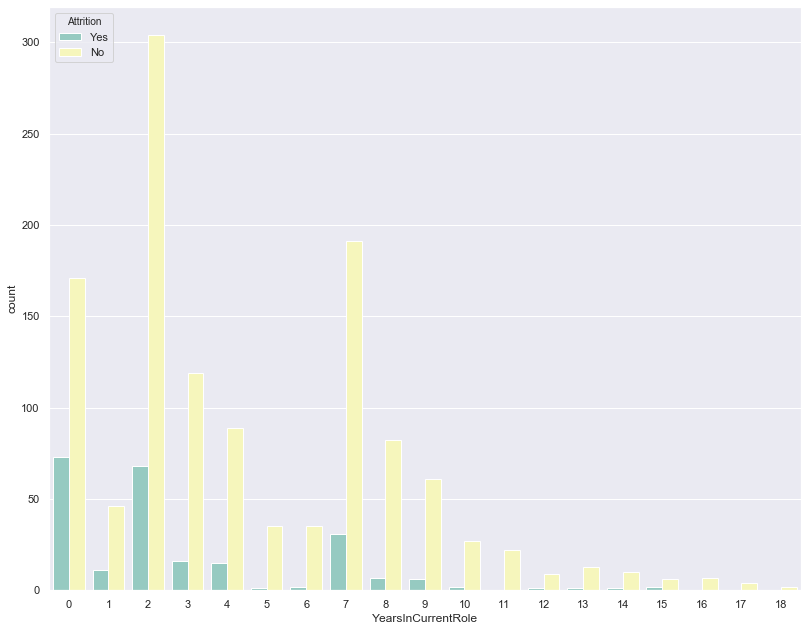

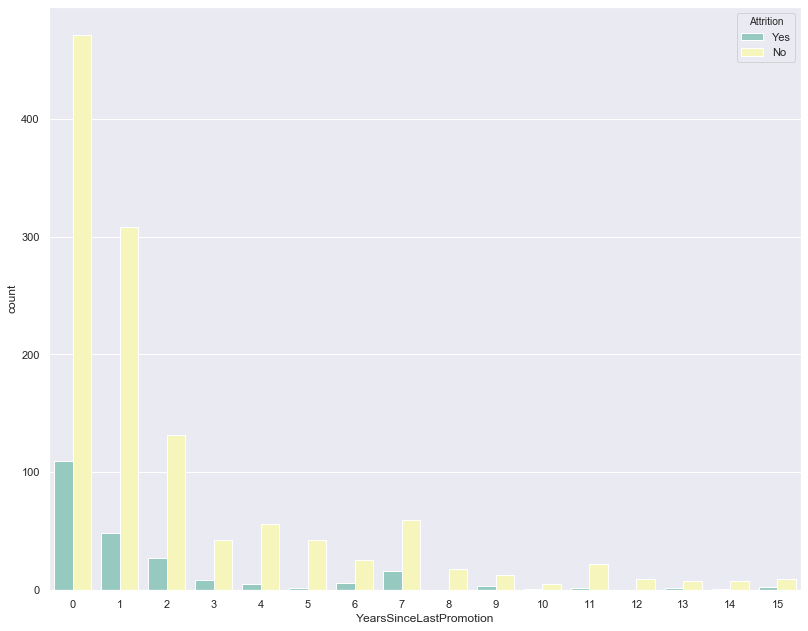

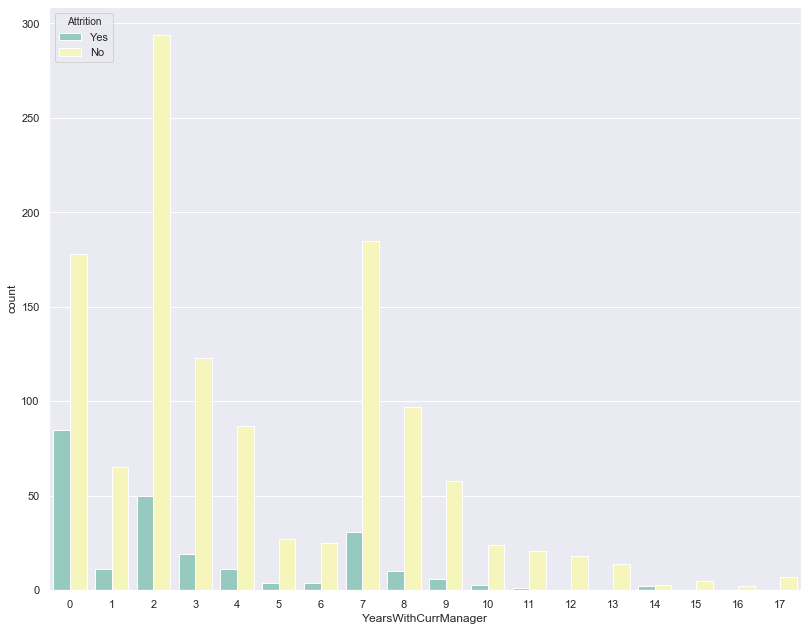

In [10]:
features = ['Age', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

for f in features:
    sns.countplot(x=f, data=data, palette='Set3', hue='Attrition')
    plt.show()

In [11]:
data['Attrition'].replace({'Yes': 1, 'No': 0}, inplace=True)
data['Education'].replace({1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}, inplace=True)
cols = ['EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance']
for col in cols:
    data[col].replace({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}, inplace=True)

data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,College,Life Sciences,Medium,Female,High,...,High,Low,0,8,0,Low,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,Below College,Life Sciences,High,Male,Medium,...,Very High,Very High,1,10,3,High,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,College,Other,Very High,Male,Medium,...,High,Medium,0,7,3,High,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,Master,Life Sciences,Very High,Female,High,...,High,High,0,8,3,High,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,Below College,Medical,Low,Male,High,...,High,Very High,1,6,3,High,2,2,2,2


In [12]:
categorical_columns = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']
new_data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
print(data.shape)
print(new_data.shape)
new_data.head()

(1470, 27)
(1470, 59)


,Age,Attrition,DistanceFromHome,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,...,PerformanceRating_Very High,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very High,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_Low,WorkLifeBalance_Medium,WorkLifeBalance_Very High
0,41,1,1,5993,11,8,0,6,4,0,...,0,1,0,0,0,0,0,1,0,0
1,49,0,8,5130,23,10,3,10,7,1,...,1,0,0,1,1,0,0,0,0,0
2,37,1,2,2090,15,7,3,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,33,0,3,2909,11,8,3,8,7,3,...,0,0,0,0,0,0,0,0,0,0
4,27,0,2,3468,12,6,3,2,2,2,...,0,0,0,1,1,0,0,0,0,0


In [13]:
for col in new_data.columns:
    print(col)

Age
Attrition
DistanceFromHome
MonthlyIncome
PercentSalaryHike
TotalWorkingYears
TrainingTimesLastYear
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager
BusinessTravel_Travel_Frequently
BusinessTravel_Travel_Rarely
Department_Research & Development
Department_Sales
Education_Below College
Education_College
Education_Doctor
Education_Master
EducationField_Life Sciences
EducationField_Marketing
EducationField_Medical
EducationField_Other
EducationField_Technical Degree
EnvironmentSatisfaction_Low
EnvironmentSatisfaction_Medium
EnvironmentSatisfaction_Very High
Gender_Male
JobInvolvement_Low
JobInvolvement_Medium
JobInvolvement_Very High
JobLevel_2
JobLevel_3
JobLevel_4
JobLevel_5
JobRole_Human Resources
JobRole_Laboratory Technician
JobRole_Manager
JobRole_Manufacturing Director
JobRole_Research Director
JobRole_Research Scientist
JobRole_Sales Executive
JobRole_Sales Representative
JobSatisfaction_Low
JobSatisfaction_Medium
JobSatisfaction_Very High
MaritalS

In [14]:
X = new_data.drop('Attrition', axis=1).values
y = new_data['Attrition']

y = y.astype(int)

print(X.shape)
print(y.shape)

(1470, 58)
(1470,)


In [15]:
dt = DecisionTreeClassifier(random_state=15, criterion='entropy', max_depth=10)
dt.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=15, splitter='best')

In [16]:
fi_col = []
fi = []

for i, column in enumerate(new_data.drop('Attrition', axis=1)):
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns=['Feature', 'Feature Importance'])
fi_df = fi_df.sort_values('Feature Importance', ascending=False).reset_index()
fi_df

,index,Feature,Feature Importance
0,2,MonthlyIncome,0.148762
1,47,OverTime_Yes,0.078176
2,0,Age,0.075061
3,1,DistanceFromHome,0.074860
4,4,TotalWorkingYears,0.064272
5,3,PercentSalaryHike,0.050279
6,9,YearsWithCurrManager,0.045445
7,8,YearsSinceLastPromotion,0.044853
8,6,YearsAtCompany,0.033895
9,46,MaritalStatus_Single,0.027215


In [18]:
columns_to_keep = fi_df['Feature'][:40]
columns_to_keep

0                          MonthlyIncome
1                           OverTime_Yes
2                                    Age
3                       DistanceFromHome
4                      TotalWorkingYears
5                      PercentSalaryHike
6                   YearsWithCurrManager
7                YearsSinceLastPromotion
8                         YearsAtCompany
9                   MaritalStatus_Single
10            JobRole_Research Scientist
11                 TrainingTimesLastYear
12                EducationField_Medical
13           EnvironmentSatisfaction_Low
14               JobRole_Sales Executive
15                   WorkLifeBalance_Low
16          EducationField_Life Sciences
17                    JobInvolvement_Low
18                            JobLevel_3
19                   JobSatisfaction_Low
20             WorkLifeBalance_Very High
21      BusinessTravel_Travel_Frequently
22        EnvironmentSatisfaction_Medium
23                    YearsInCurrentRole
24          Rela

In [19]:
print(new_data.shape)
print(new_data[columns_to_keep].shape)

(1470, 59)
(1470, 40)


In [20]:
X = new_data[columns_to_keep].values
y = new_data['Attrition']
y = y.astype(int)

print(X.shape)
print(y.shape)

(1470, 40)
(1470,)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(1058, 40)
(294, 40)
(118, 40)
(1058,)
(294,)
(118,)


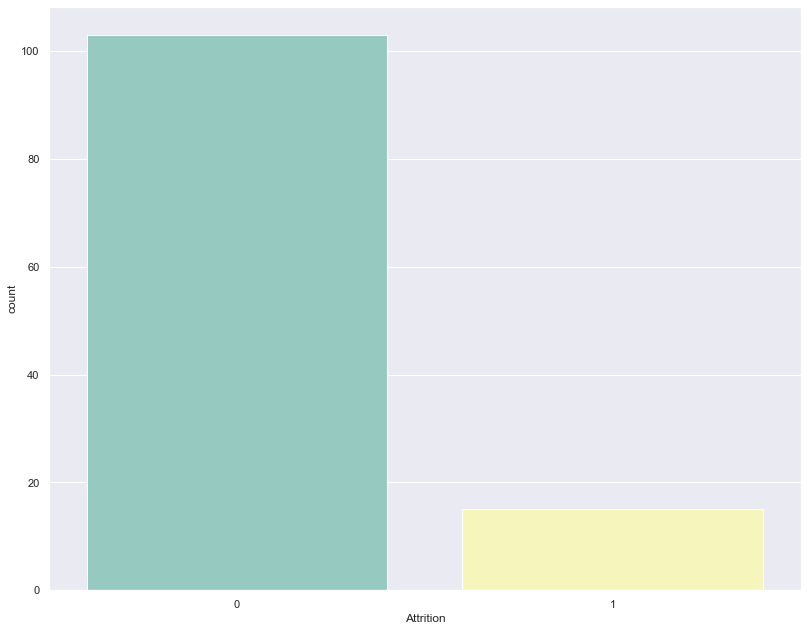

In [23]:
ax = sns.countplot(x=y_val, palette='Set3')

In [24]:
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_pred = logreg.predict(X_train)
pred_proba = logreg.predict_proba(X_train)

print('The training accuracy is: ', logreg.score(X_train, y_train))
print('The testing accuracy is: ', logreg.score(X_test, y_test))

print(classification_report(y_train, y_pred))

The training accuracy is:  0.8383742911153119
The testing accuracy is:  0.8367346938775511
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       884
           1       0.71      0.03      0.06       174

    accuracy                           0.84      1058
   macro avg       0.78      0.51      0.48      1058
weighted avg       0.82      0.84      0.77      1058



In [26]:
def plot_cm(cm, classes=None, title='Confusion Matrix'):
    if classes is not None:
        sns.heatmap(cm, cmap='YlGnBu', xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size': 50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

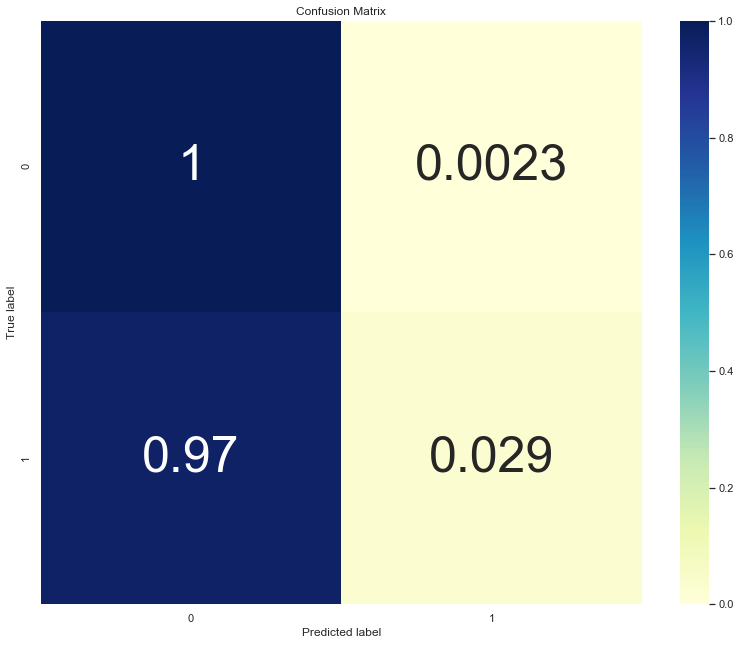

In [27]:
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1, 1)

plot_cm(cm_norm, classes=logreg.classes_, title='Confusion Matrix')

In [28]:
cm

array([[882,   2],
       [169,   5]], dtype=int64)

In [32]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

TPR = TP / (TP + FN)
print('The true positive rate is:', TPR)

PPV = TP / (TP + FP)
print('The positive predictive value is:', PPV)

FPR = FP / (FP + TN)
print('The false positive rate is:', FPR)

FNR = FN / (FN + TP)
print('The false negative rate is:', FNR)

print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)

The true positive rate is: [0.99773756 0.02873563]
The positive predictive value is: [0.83920076 0.71428571]
The false positive rate is: [0.97126437 0.00226244]
The false negative rate is: [0.00226244 0.97126437]

The average TPR is: 0.513236594372497
The average Precision is: 0.7767432377327715
The average False positive rate is: 0.486763405627503
The average False Negative Rate is: 0.486763405627503


In [34]:
print('The log loss on training is: ', log_loss(y_train, pred_proba))

pred_proba_t = logreg.predict_proba(X_test)
print('The log loss on testing is: ', log_loss(y_test, pred_proba_t))

The log loss on training is:  0.38848804341424087
The log loss on testing is:  0.43647210834648453


In [36]:
Cs = np.geomspace(1e-5, 1e5, num=20)

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True)

logreg2 = LogisticRegressionCV(Cs=Cs, solver='lbfgs')
logreg2.fit(X_train, y_train)
print('The CA is:', logreg2.score(X_test, y_test))

pred_proba_t = logreg2.predict_proba(X_test)
logloss2 = log_loss(y_test, pred_proba_t)
print('The logistic loss is:', logloss2)

print('The optimal C parameter is: ', logreg2.C_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

The CA is: 0.8571428571428571
The logistic loss is: 0.3361695764330177
The optimal C parameter is:  [6.15848211]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg